# DATA DISCRIPTION :
    
The data consists of 10,000 observations of space taken by the SDSS.
Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

    objid = Object Identifier
    ra = J2000 Right Ascension (r-band)
    dec = J2000 Declination (r-band)
    u = better of DeV/Exp magnitude fit
    g = better of DeV/Exp magnitude fit
    r = better of DeV/Exp magnitude fit
    i = better of DeV/Exp magnitude fit
    z = better of DeV/Exp magnitude fit
    run = Run Number
    rereun = Rerun Number
    camcol = Camera column
    field = Field number
    specobjid = Object Identifier
    class = object class (galaxy, star or quasar object)
    redshift = Final Redshift
    plate = plate number
    mjd = MJD of observation
    fiberid = fiber ID
    
## PROBLEM DEFINITION : 
## WE HAVE TO PREDICT THE CLASS OF THE GIVEN DATA BY USING A MACHINE LEARNING MODEL TO DENOTE WEATHER IT IS AN STAR,GALAXY OR AN QSO.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("Space Server Dataset.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape

(10000, 18)

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


## "CLASS" is our target data, thus we will check for its unique values.

In [6]:
df["class"].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

# Now we will use Label Encoder to encode the "class" and "objid" column to respective values.

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in df.columns:
    df["class"]=le.fit_transform(df["class"])

In [8]:
df["objid"]=le.fit_transform(df["objid"])

In [9]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,0,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,0,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,0,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,0,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,0,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,0,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,0,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [10]:
df["objid"].unique()

array([0], dtype=int64)

In [11]:
df["class"].unique()

array([2, 0, 1], dtype=int64)

# Now we can see that the "class" has been encoded

## 0-GALAXY

## 1-QSO

## 2-STAR

# BASIC STATISTICAL DATA

In [12]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,0.0,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,0.0,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,0.0,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,0.0,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,0.0,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,0.0,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


# UNIVARIATE ANALYSIS

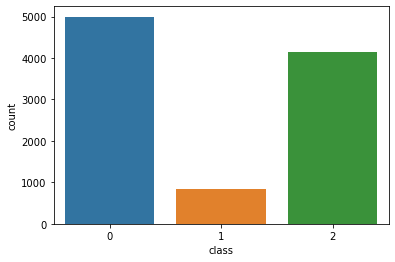

In [42]:
sn.countplot(x="class",data=df)

# The given Data-set contains lots of Stars and Galaxies when compared to QSO.

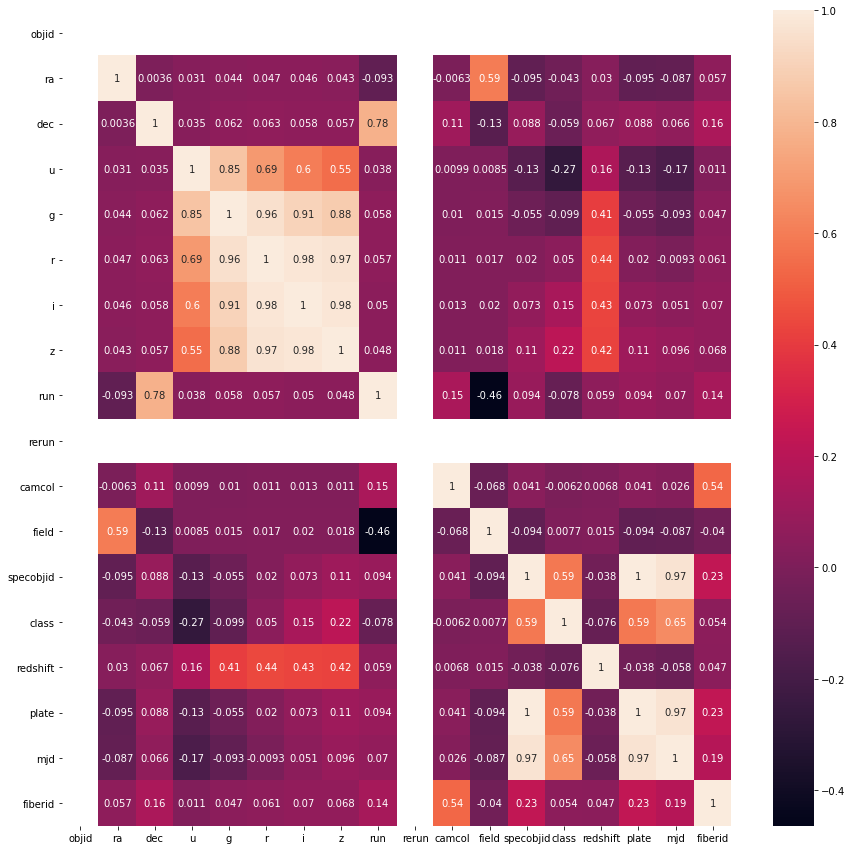

In [13]:
corr=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

# From the above correlation tabel we can see that 'objid' and 'rerun' doesnot give any analytic value to our Data-set.

In [14]:
df.drop(["objid","rerun"],axis=1,inplace=True)
df

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [15]:
df.shape

(10000, 16)

# Finding the NaN values

In [16]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

# PLOTTING THE OUTLIERS

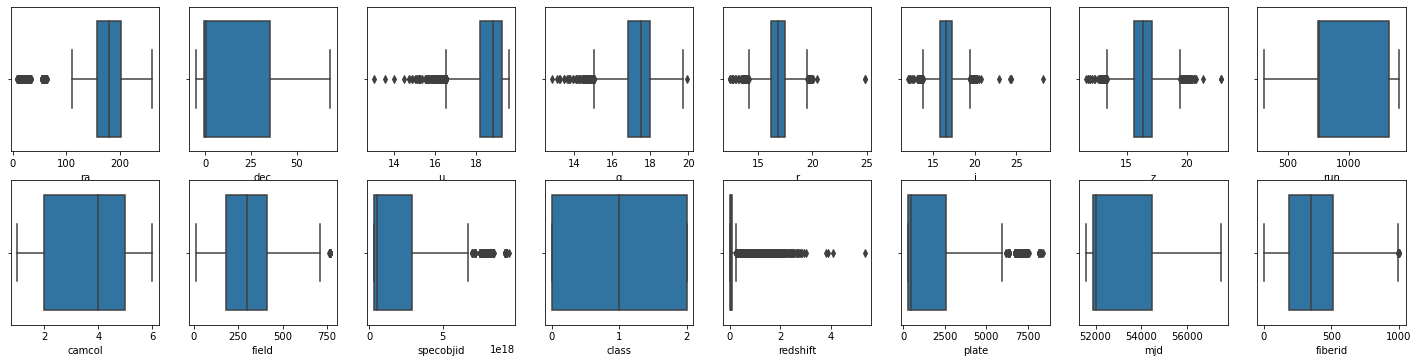

In [17]:
collist=df.columns.values
ncol=8
nrow=8
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

# This above box-plot confrims the presence of outliers in the data-set.so, we use z-score method to remove the outliers.

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [20]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


# CHECKING THE SKEWNESS OF THE GIVEN DATA-SET

In [21]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

# CORRECTING THE SKEWNESS FROM THE GIVEN DATA-SET USING THE LOG TRANSFORM METHOD.

In [22]:
from scipy.stats import boxcox
df["ra"]=boxcox(df["ra"],0) #0 represents log transform
df["u"]=boxcox(df["u"],0)
df["specobjid"]=boxcox(df["specobjid"],0)
df["plate"]=boxcox(df["plate"],0)
df["mjd"]=boxcox(df["mjd"],0)

# PREPARING DATA-SET FOR TRAINING AND TESTING

In [23]:
x=df.drop("class",axis=1)
y=df["class"]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [25]:
x_train.shape

(7000, 15)

In [26]:
y_train.shape

(7000,)

In [27]:
x_test.shape

(3000, 15)

In [28]:
y_test.shape

(3000,)

## MACHINE LEARNING MODELS
## For the above data-set we will use

## 1.LOGISTIC REGRESSION

## 2.NAIVES BAYES CLASSIFICATION

## 3.RANDOM FOREST

In [29]:
#Logictic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred))
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[0 2 0 ... 2 0 0]

Accuracy score :  0.77

Confussion matrix :  [[1360    4  133]
 [ 178   57   51]
 [ 307   17  893]]

classification report :                precision    recall  f1-score   support

           0       0.74      0.91      0.81      1497
           1       0.73      0.20      0.31       286
           2       0.83      0.73      0.78      1217

    accuracy                           0.77      3000
   macro avg       0.77      0.61      0.64      3000
weighted avg       0.77      0.77      0.75      3000



In [30]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=98.22817848107545,cross_value_score=97.97840198789764,and difference=0.24977649317780504


In [31]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
acc={metrics.accuracy_score(y_test, y_pred)*100}
print("Accuracy:",acc)

Accuracy: {88.16666666666667}


# From the above Machine Learning Models we can conclude that Random Forest Regressor has the highest accuracy rate of "98.2"% with a negligble difference. 

## Thus, we will use "Random Forest Regressor" for the prediction.

## HYPER TUNNING THE MACHINE LEARNING MODEL :

In [32]:
#creating parameter list to pass in gridsearch CV
parameters={"criterion":["mse"],"n_estimators":[200]}

In [33]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(rf,parameters,cv=5,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("final accuracy = ",r2_score(y_test,GCV_pred)*100)

final accuracy =  98.29323565157001


# THUS WE INFER THAT THE FINAL ACCURACY FOR OUR MACHINE LEARNING MODEL IS 98.2%

# SAVING THE MODEL

In [43]:
import joblib 
joblib.dump(rf,"Space Server Dataset.pkl")

['Space Server Dataset.pkl']

In [34]:
df_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


# PREDICTING THE CLASS WITH A SAMPLE DATA

In [35]:
td=np.array([131.2,0.1,18.1,16.0,15.5,15.2,14.3,752,3,267,3.72,0.11,287,51877,228])
td.shape

(15,)

In [36]:
td=td.reshape(1,-1)
td

array([[1.3120e+02, 1.0000e-01, 1.8100e+01, 1.6000e+01, 1.5500e+01,
        1.5200e+01, 1.4300e+01, 7.5200e+02, 3.0000e+00, 2.6700e+02,
        3.7200e+00, 1.1000e-01, 2.8700e+02, 5.1877e+04, 2.2800e+02]])

In [37]:
rf.predict(td)

array([0.4])

In [39]:
a=np.array(y_test)
predicted=np.array(y_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.head()

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,2,2


# CONCLUSION REMARKS:
## We can visibly see that the Machine learning model performs well with a higher accuracy of prediction.